# Recurrent Neural Network

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

## Part 1 - data Preprocessing


### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scalling

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []

for i in range(60, 1258):

  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)



### Reshaping

In [11]:
X_train = np.reshape(X_train,
                     (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building the RNN

### Importing the Keras libraries and packages

In [14]:
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [15]:
regressor = Sequential()

### Adding the first LSTM and some Dropout regularisation



In [16]:
regressor.add(LSTM(units = 50, return_sequences= True,
                   input_shape = (X_train.shape[1], 1)))

regressor.add(Dropout(0.2))

### Adding a second LSTM and some Dropout regularisation


In [17]:
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

### Adding a third LSTM and some Dropout regularisation


In [18]:
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM and some Dropout regularisation


In [19]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [20]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [21]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [22]:
regressor.fit(X_train, y_train, epochs = 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 173ms/step - loss: 0.0454
Epoch 2/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 6s 172ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 7s 196ms/step - loss: 0.0045
Epoch 6/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 6s 144ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0035
Epoch 13/100

In [25]:
regressor.save('my_model.h5') 

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [24]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the prdicted stock price of 2017

In [27]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                         axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)

inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):

  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,
                     (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

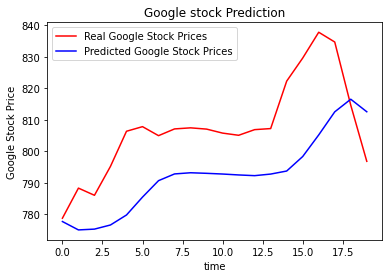

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Prices')
plt.plot(predicted_stock_price, color = 'blue', 
         label = 'Predicted Google Stock Prices')

plt.title('Google stock Prediction')
plt.xlabel('time')

plt.ylabel('Google Stock Price')
plt.legend()

plt.show()